In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
# Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
# Load the dataset into a DataFrame
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# Step 3: Data Preprocessing
# Check for missing values and handle them
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Convert categorical variables to numerical
df = pd.get_dummies(df, drop_first=True)

In [6]:
print(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'customerID_0003-MKNFE',
       'customerID_0004-TLHLJ', 'customerID_0011-IGKFF',
       'customerID_0013-EXCHZ', 'customerID_0013-MHZWF',
       'customerID_0013-SMEOE', 'customerID_0014-BMAQU',
       ...
       'TotalCharges_996.45', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'Churn_Yes'],
      dtype='object', length=13602)


In [7]:
# Define feature and target variables
X = df.drop('Churn_Yes', axis=1)  # Drop the target column from features
y = df['Churn_Yes']  # Define the target variable

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [10]:
# Make predictions
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8246983676366217
Confusion Matrix:
 [[941  95]
 [152 221]]
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.91      0.88      1036
        True       0.70      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



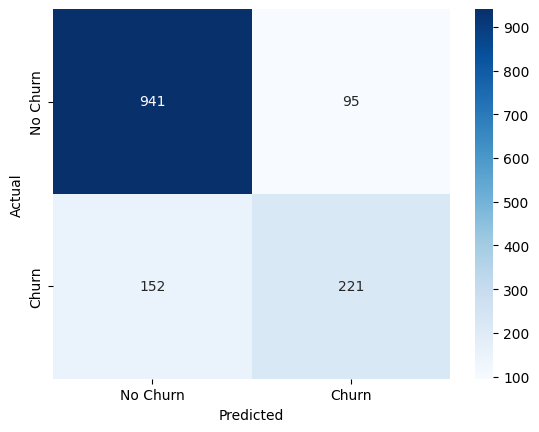

In [12]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

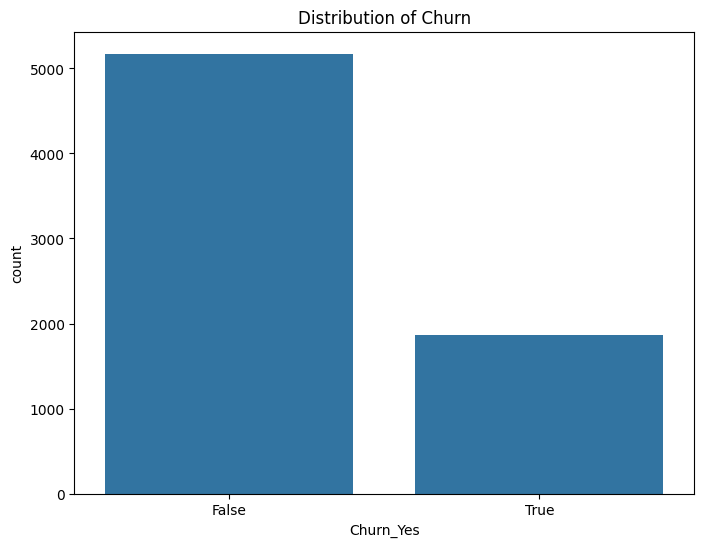

In [13]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn_Yes', data=df)
plt.title('Distribution of Churn')
plt.show()

In [14]:
print("Churn prediction in telecom industry using Logistic Regression is done")

Churn prediction in telecom industry using Logistic Regression is done
